In [1]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import scanpy as sc

from scverse_plotting_api import plot_umap

plt.rcParams["figure.figsize"] = (3, 2)

In [3]:
adata = sc.datasets.pbmc68k_reduced()

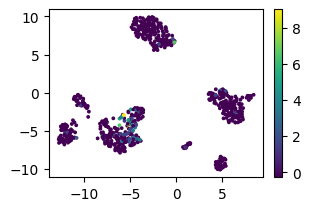

In [4]:
plot_umap(adata, color=["CD8A"])

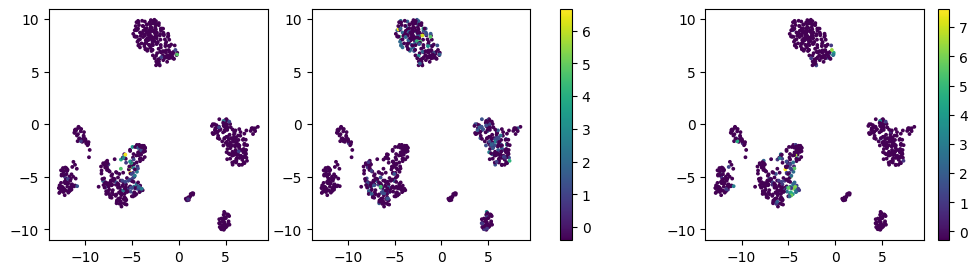

In [5]:
fig = plt.Figure(figsize=(12, 3))
gs = plt.GridSpec(1, 3, fig)
plot_umap(adata, color=["CD8A", "CD4"], ax=gs[:2])
with plt.rc_context({"image.cmap": "plasma"}):
    plot_umap(adata, color=["CD8B"], ax=gs[2])
fig

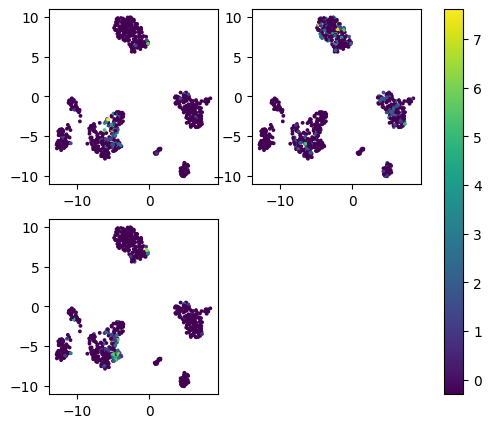

In [6]:
fig = plt.Figure(figsize=(6, 5))
gs = plt.GridSpec(2, 2, fig)
plot_umap(adata, color=["CD8A", "CD4", "CD8B"], ax=gs)
fig

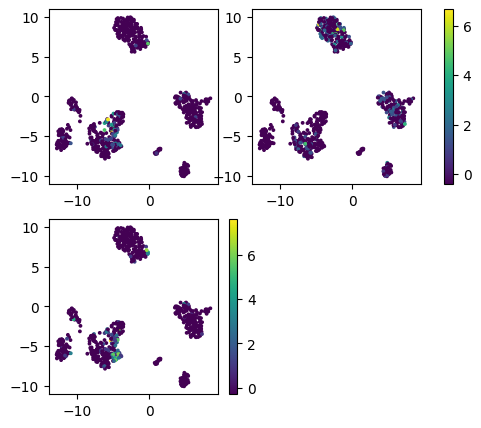

In [7]:
fig = plt.Figure(figsize=(6, 5))
gs = plt.GridSpec(2, 2, fig)
plot_umap(adata, color=["CD8A", "CD4"], ax=gs[:2])
with plt.rc_context({"image.cmap": "plasma"}):
    plot_umap(adata, color=["CD8B"], ax=gs[2:4])
fig

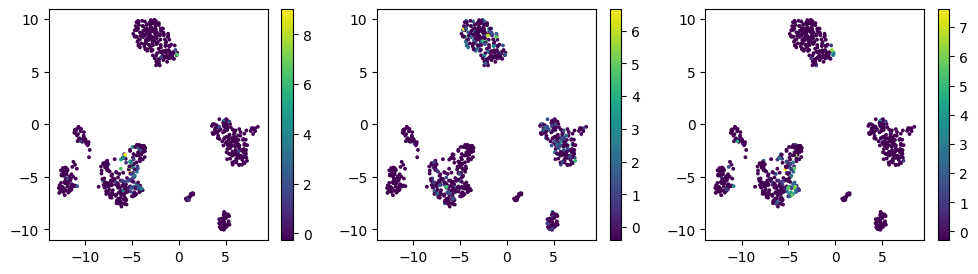

In [8]:
with plt.rc_context({"figure.figsize": (12, 3)}), plt.ioff():
    fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
plot_umap(adata, color=["CD8A"], ax=ax0)
plot_umap(adata, color=["CD4"], ax=ax1)
plot_umap(adata, color=["CD8B"], ax=ax2)
fig